<a href="https://colab.research.google.com/github/gael-roustan-epsi-2022/ia-notebooks/blob/main/K_Means_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La méthode de clustering des k-means est une méthode dite non-supervisée. Cela signifie que nous ne commeçons pas le résultat attendu et donc il n'est pas possible d'entraîner notre modèle en fonction d'un résultat attendu.

Le clustering est un moyen de regrouper différents points dans un même ensemble en considérant un centre (ou plutôt appelé centroïde) dont les points sont les plus proches possibles.

Certains modules ne sont pas présents par défaut, notamment le module kneed qu'il faut installer grâce au gestionnaire de paquets python pip.

In [2]:
!pip install kneed

voici les différents imports nécessaires

In [3]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Nous commeçons par générer un jeu de données complètement factice grâce à la méthode `make_blobs`

In [4]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

Afficher les 10 premiers éléments des caractéristiques (features)

In [ ]:
print('FIXME')

Afficher les 10 premiers éléments des résultats (labels)

In [ ]:
print('FIXME')

Comme tous les problèmes de Machine Learning, avant de commencer à modéliser notre problème, nos différentes caractéristiques doivent être à la même échelle, il faut donc les normaliser.

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Il existe plein d'autres méthodes de normalisation. Faites une recherche pour trouver comment utiliser la méthode du MinMax en respectant la même méthode d'application que la Standard.

In [ ]:
print('FIXME')


Notre jeu de données étant normalisé, nous sommes prêts à tenter de définir des regroupements. Quelques explications sur les paramètres
 

*   init : spécifie une technique d'initilisation des centroides
*   n_clusters : spécifie le nombre de clusters attendu
*   n_init : nombre de scénarios de départ à réaliser pour ensuite renvoyer le k-means possédant la plus petite erreur SSE
*   max_iter : nombre maximum d'itérations



In [28]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

Le modèle est prêt à être appliqué à notre jeu de données normalisé

In [29]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

Une fois le traitement terminé via l'appel de la méthode `fit`, `kmeans`  possède de nouveaux attributs
* `inertia_` : donne l'erreur
* `cluster_centers_`
* `n_iter_`
* `labels_`


Afficher chacun de ces paramètres et donner le type de `labels_`

In [ ]:
print('FIXME')

Plutôt que de spécifier le nombre de clusters en dur, il est possible de trouver le nombre optimal de clusters. Il existe 2 principales méthodes.


1.   elbow method (point d'inflexion)
2.   silhouette coefficient



In [9]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Pour visualiser le point d'inflexion avant de tenter de le trouver programmatiquement, voici le code pour afficher le graphique de l'évolution du SSE en fonction du nombre de clusters.

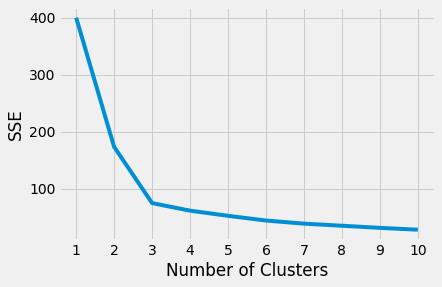

In [10]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

Pour trouver le point d'inflexion programmatiquement, il faut utiliser le module KneeLocator

In [11]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

Pour terminer, affichons les points et les centroides.

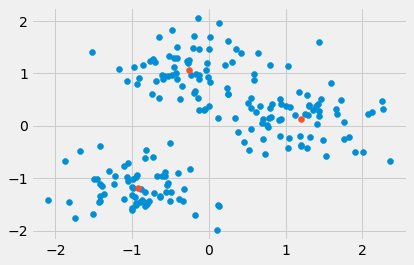

In [31]:
print('FIXME')